In [1]:
from algorithm.utils.data.tf.dataimage import DataImage
import tensorflow as tf
import keras

In [2]:
dataset = DataImage(data_path="Input/dataset", split=0.2, resize=True, height='auto', width='auto', normalize=True, mean='auto', name="Electronic components dataset", batch_size=16)

In [3]:
dataset

Electronic components dataset
	Number of points: 1223
	Root location: Input/dataset
	Split: 0.2
	Transform used:	Resize(size=(128, 128)
	Normalize(mean=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098], std=None)


In [4]:
trainset = dataset.get_set(split="train")
validset = dataset.get_set(split="validation")

In [5]:
# get some random training images
dataiter = iter(trainset)
images, labels = next(dataiter)

In [6]:
images.shape, len(labels)

(TensorShape([16, 128, 128, 3]), 16)

In [7]:
images

<tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
array([[[[0.12075675, 0.16781558, 0.11291361],
         [0.11058518, 0.157644  , 0.10274204],
         [0.12156864, 0.16862746, 0.1137255 ],
         ...,
         [0.10790442, 0.15496324, 0.10006128],
         [0.11764707, 0.16470589, 0.10980393],
         [0.11764707, 0.16470589, 0.10980393]],

        [[0.11266851, 0.15972733, 0.10482538],
         [0.11266851, 0.15972733, 0.10482538],
         [0.1272978 , 0.17435662, 0.11945467],
         ...,
         [0.10482538, 0.1518842 , 0.09698223],
         [0.10482538, 0.1518842 , 0.09698223],
         [0.11468267, 0.1617415 , 0.10683954]],

        [[0.11764707, 0.16470589, 0.10980393],
         [0.10631128, 0.15337011, 0.09846814],
         [0.10105244, 0.14811127, 0.0932093 ],
         ...,
         [0.1137255 , 0.16078432, 0.10588236],
         [0.1137255 , 0.16078432, 0.10588236],
         [0.12685356, 0.17391239, 0.11901043]],

        ...,

        [[0.11132263, 0.15838145,

In [8]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'GATE', b'PINTH', b'RESISTOR', b'R10', b'CAPACITOR', b'DIODE',
       b'CAPACITOR', b'RESISTOR', b'CAPACITOR', b'CAPACITOR', b'PINTH',
       b'PINTH', b'PINTH', b'CAPACITOR', b'RELAIS', b'X18Y4'],
      dtype=object)>

In [9]:
class_names = dataset.labels

In [10]:
class_names

['DIODE',
 'R0603',
 'R10',
 'INDUCTANCE',
 'X43Y55',
 'SFUSE',
 'STRIP6',
 'SO16',
 'X4Y18',
 'AUTIC',
 'MINIMELF',
 'LED3',
 'LED',
 'X8Y11',
 'X50Y65',
 'X18Y4',
 'SCR',
 'C0805',
 'RESISTOR',
 'R2512',
 'S5SOT23',
 'OPTOISOLATOR',
 'SO8',
 'CONNECTOR',
 'R01005',
 'R0402',
 'C1210',
 'JUMPER',
 'RELAIS',
 'R110H126',
 'C0603',
 'WSK2512',
 'R0805',
 'PINSMD',
 'PINTH',
 'R20',
 'X63H40',
 'VOLTAGEREGULATOR',
 'STRIP3',
 'R1206',
 'TRANSFORMER',
 '0805S',
 'TRIAC',
 'PLCC2LED',
 'CASEC',
 'SMB',
 'TRANSISTOR',
 'GATE',
 'MOS',
 'FUSE',
 'CTELRJ45',
 'OSCILLATOR',
 'CAPACITOR',
 'OPENFIX',
 'ZENER',
 'DIGITAL',
 'R63H40']

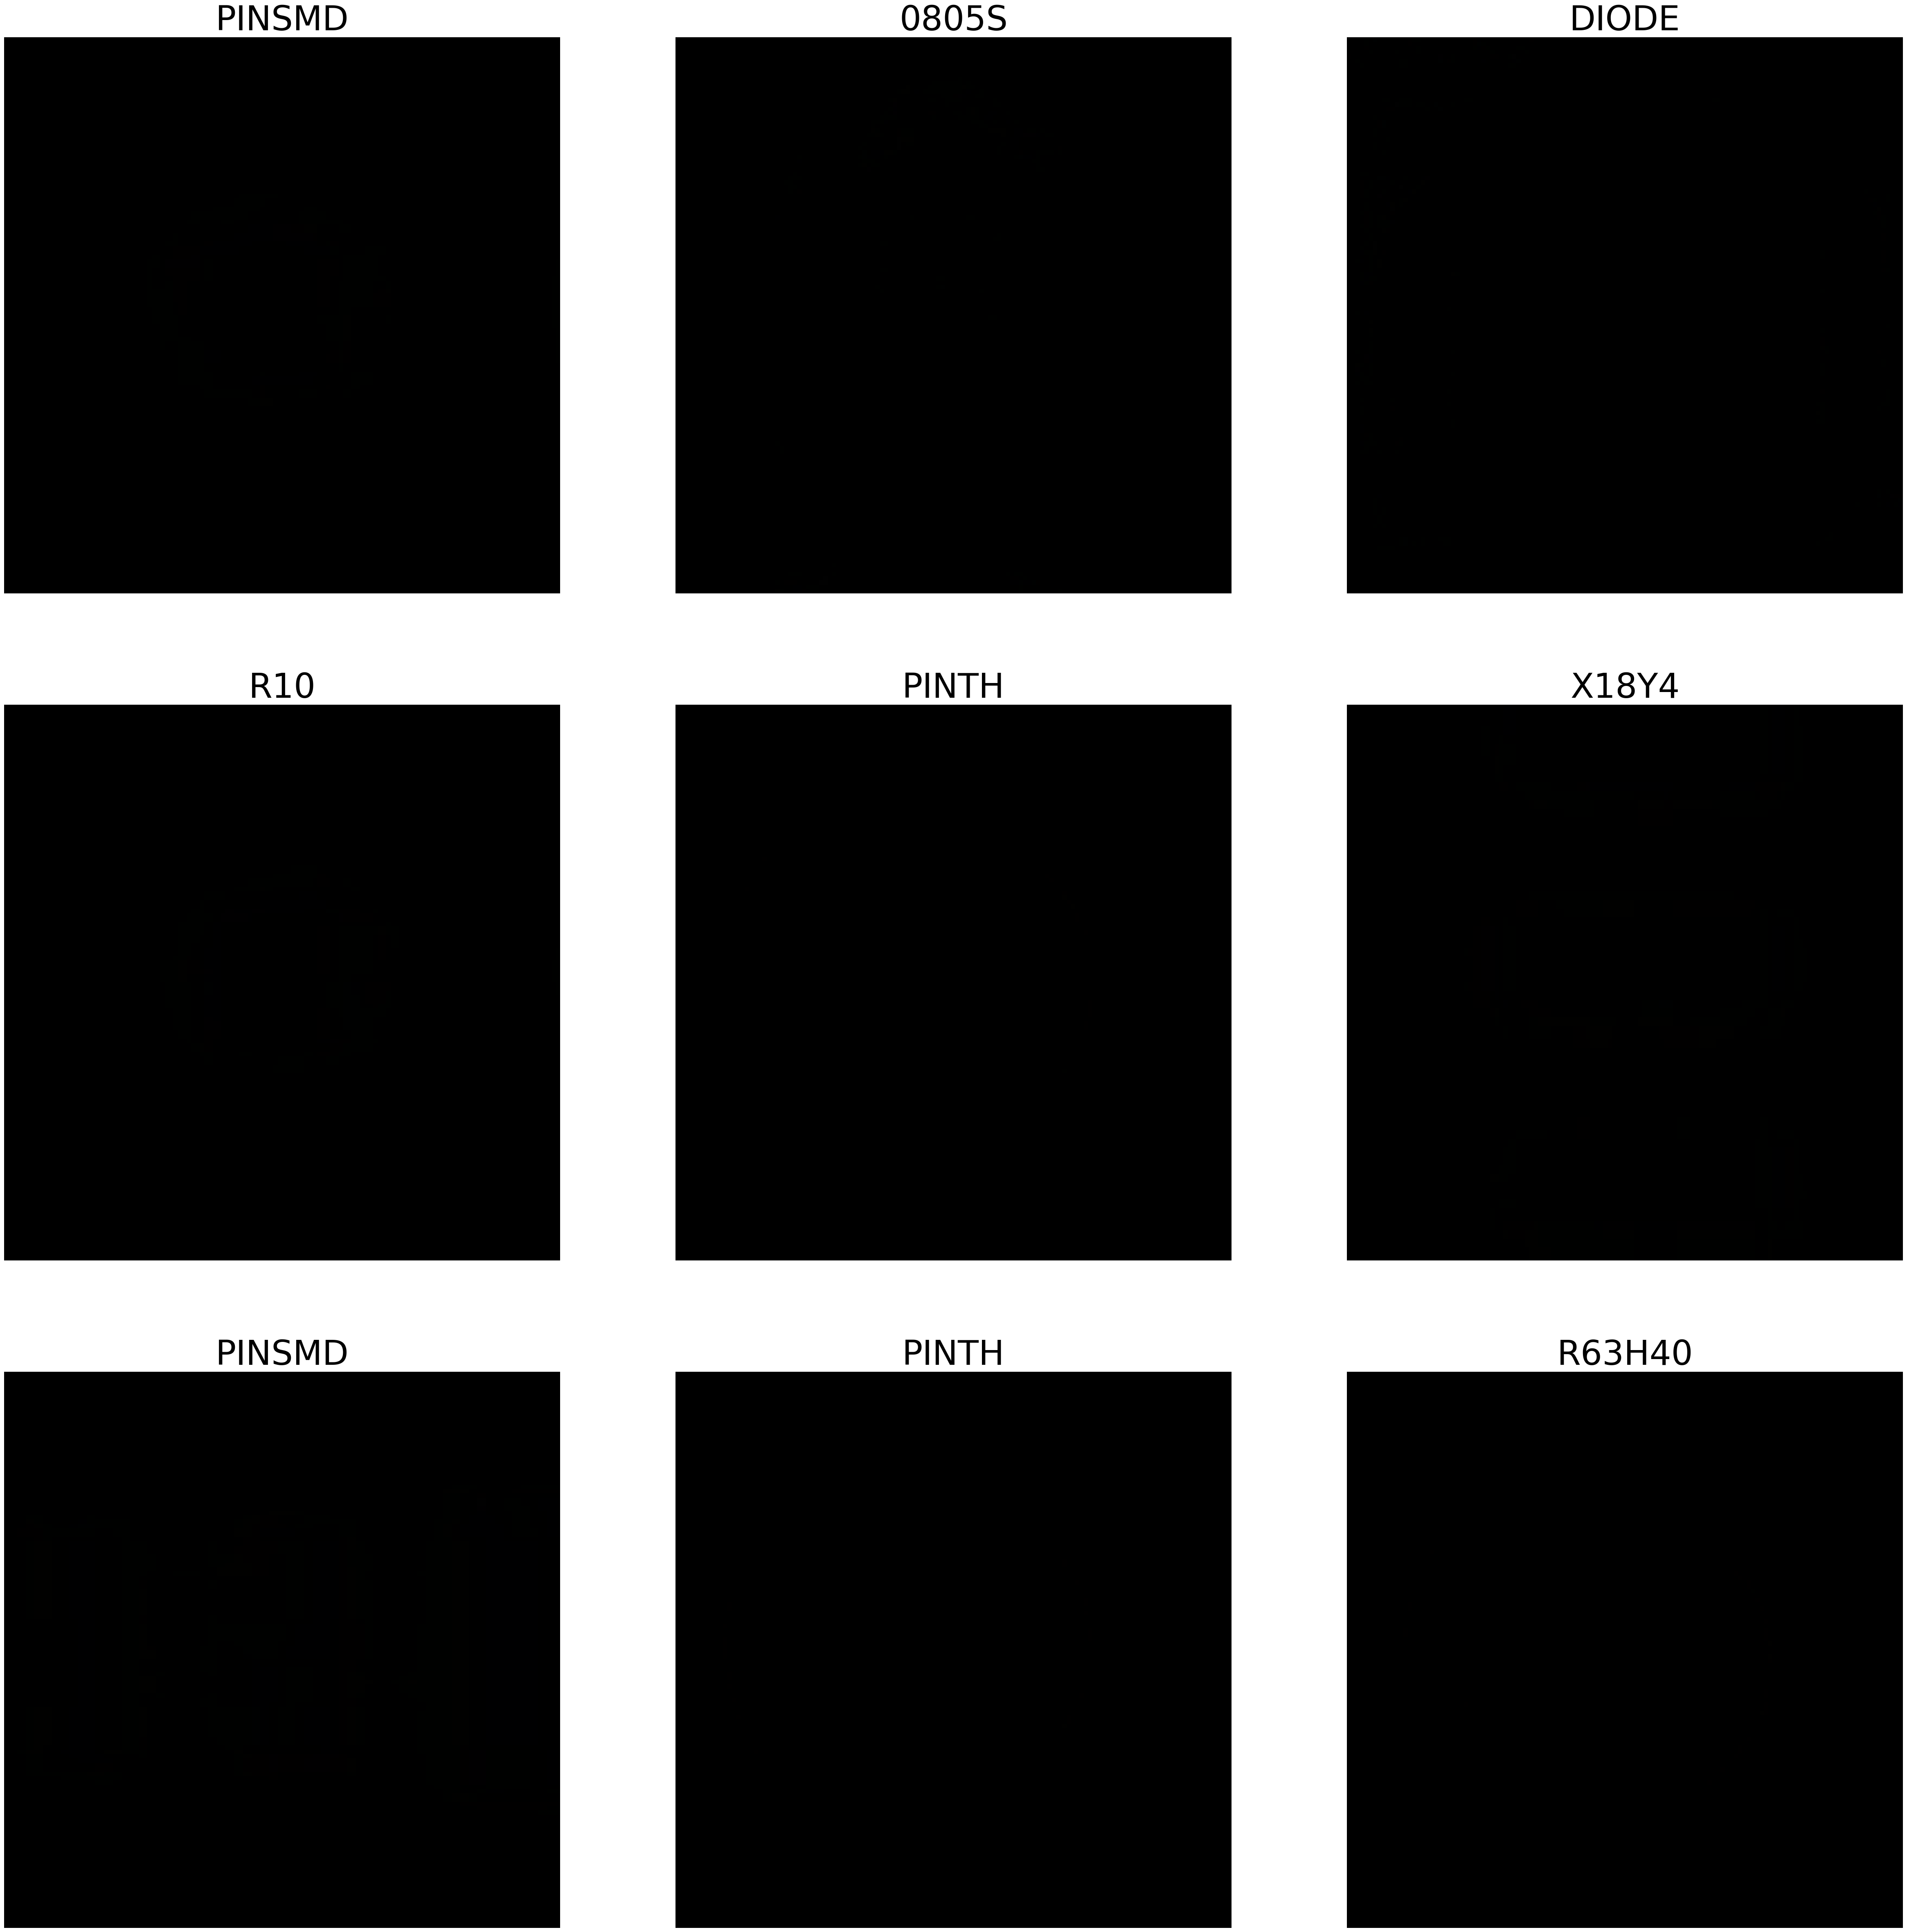

In [11]:
import matplotlib.pyplot as plt
image_batch, label_batch = next(iter(trainset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8")) # to be implemented: normalization and resize
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [12]:
from algorithm.deep.tf.neural_networks import ResNet1

In [13]:
trainset = dataset.apply_one_hot_encoding(trainset)
validset = dataset.apply_one_hot_encoding(validset)

In [14]:
model = ResNet1(len(class_names),input_shape=(128, 128, 3))

In [15]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
    run_eagerly=True,
)

In [ ]:
model.fit(trainset, validation_data=validset, epochs=1000)

Epoch 1/100
62/62 [==============================] - 38s 610ms/step - loss: 3.1748 - accuracy: 0.1645 - val_loss: 3.1662 - val_accuracy: 0.3115
Epoch 2/100
41/62 [==================>...........] - ETA: 12s - loss: 2.7534 - accuracy: 0.2134

In [ ]:
## model.summary()